In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)

In [3]:
import os
import csv

# with open(os.path.join('../Data','HomoSapiens_htb_hq.txt'), 'r') as in_file:
#     stripped = (line.strip() for line in in_file)
#     lines = (line.split("\t") for line in stripped if line)
#     with open('ppi.csv', 'w') as out_file:
#         writer = csv.writer(out_file)
#         writer.writerows(lines)

In [4]:
ppi = pd.read_csv('ppi.csv')

In [5]:
# pathway = pd.read_csv(os.path.join("./EDA","hsa05211_pathway.csv"))
# pathway.rename(columns={"Unnamed: 0": "idx"}, inplace=True)

In [6]:
def uniprot_to_entrez(gene_id):
    import urllib.parse
    import urllib.request

    url = 'https://www.uniprot.org/uploadlists/'

    params = {
    'from': 'ACC+ID',
    'to': 'P_ENTREZGENEID',
    'format': 'tab',
    'query': (gene_id)
    }

    data = urllib.parse.urlencode(params)
    data = data.encode('utf-8')
    req = urllib.request.Request(url, data)
    with urllib.request.urlopen(req) as f:
       response = f.read()
    resp = response.decode('utf-8').split('\n')
    return resp

In [7]:
uniprot2entrez_id_map = {}

In [8]:
uniprot_genes_used = set()

In [9]:
for gene in ppi.Uniprot_A:
    uniprot_genes_used.add(str(gene))
for gene in ppi.Uniprot_B:
    uniprot_genes_used.add(str(gene))

In [10]:
len(uniprot_genes_used)

10906

In [11]:
# i = 1
# gene_str = ""
# for gene in uniprot_genes_used:
#     if(i%100==0):
#         opt = uniprot_to_entrez(gene_str)
#         m = len(opt)
#         for k in range(1,m):
#             text = opt[k].split('\t')
#             if len(text)!=2:
#                 continue
#             uniprot2entrez_id_map[text[0]] = text[1]
#         gene_str = ""
#         print(i)
#         i=i+1
#     gene_str += str(gene)
#     gene_str += " "
#     i=i+1

In [12]:
# len(uniprot2entrez_id_map)

In [13]:
# ## Save to csv
# (pd.DataFrame.from_dict(data=uniprot2entrez_id_map, orient='index')
#    .to_csv('uniprot2entrez_id_map.csv', header=False))

In [14]:
with open('uniprot2entrez_id_map.csv') as csv_file:
    reader = csv.reader(csv_file)
    uniprot2entrez_id_map = dict(reader)

In [15]:
len(uniprot2entrez_id_map)

10140

In [16]:
genes_not_mapped = uniprot_genes_used.difference(uniprot2entrez_id_map.keys())

In [17]:
genes_not_mapped

{'A0A024R6G0',
 'A0A024RA76',
 'A0A024RA87',
 'A0A059RUZ1',
 'A0A1B0GWI1',
 'A0A384ME25',
 'A1L3X4',
 'A2ABK9',
 'A2AE51',
 'A2BHY8',
 'A2RRG2',
 'A2RU56',
 'A2VEC9',
 'A4D1I3',
 'A4FVC0',
 'A4QPH2',
 'A5PKX9',
 'A6NCI0',
 'A6ND79',
 'A6NG51',
 'A6NHQ2',
 'A6NKH4',
 'A6NLP3',
 'A6NLR5',
 'A6NN06',
 'A6NN80',
 'A6PW31',
 'A7E1Y8',
 'A8CG34',
 'A8K1X2',
 'A8K251',
 'A8K2R3',
 'A8K3Q9',
 'A8K8Y5',
 'A8K900',
 'A8K940',
 'A8K9C1',
 'A8KA83',
 'A8MTJ1',
 'A8MWX0',
 'A9C4B2',
 'A9R9P8',
 'A9UF07',
 'B0FTY2',
 'B0QY85',
 'B0QZE7',
 'B0UZY3',
 'B0V265',
 'B1AHD6',
 'B1AHK1',
 'B1AJQ0',
 'B1AJZ0',
 'B1AKJ2',
 'B1AL64',
 'B1ALB5',
 'B1ALL0',
 'B1ALV1',
 'B1AM49',
 'B1AMV0',
 'B1AN94',
 'B1ANA3',
 'B1ANN6',
 'B1AQP4',
 'B1AVT1',
 'B1B0M1',
 'B2R4U6',
 'B2R550',
 'B2R5P6',
 'B2R6J3',
 'B2R7W0',
 'B2R8T5',
 'B2R8Y4',
 'B2R9H7',
 'B2R9Y1',
 'B2RDC9',
 'B2RDE6',
 'B2RDX5',
 'B3KM70',
 'B3KNS4',
 'B3KPL7',
 'B3KS98',
 'B3KSN7',
 'B3KWQ7',
 'B4DE62',
 'B4DE84',
 'B4DF73',
 'B4DHJ7',
 'B4DI28',
 'B4DJP2

In [18]:
uniprot_genes_used.intersection_update(uniprot2entrez_id_map.keys())

In [19]:
len(uniprot_genes_used)

10140

In [20]:
path = '/Users/ishitamed/Downloads/GCN_Dataset/CSV/'
os.listdir(path)

['Log_transformed_889_RCC.csv',
 'KIRP_290_tumors_log_transformed.csv',
 '.DS_Store',
 'Clinical_KICH_81_tumors.csv',
 'KIRC_518_tumors_log_transformed.csv',
 'KICH_81_tumors_log_transformed.csv',
 'Log_transformed_25_KICH_normal.csv',
 'Clinical_KIRP_290_tumors.csv',
 'Log_transformed_129_normal.csv',
 'Clinical_KIRC_518_tumors.csv',
 'Log_transformed_72_KIRC_normal.csv',
 'Log_transformed_32_KIRP_normal.csv']

In [21]:
def load_dataset(path, filename, transpose=True):
    '''
        Loads the dataset and converts into its transpose with appropriate columns
    '''
    df = pd.read_csv(os.path.join(path, filename))
    df.rename(columns={"Unnamed: 0": "pid"}, inplace=True)
    if transpose:
        df = df.astype({"pid": str})
        df = df.T
        new_header = df.iloc[0] 
        df = df[1:]
        df.columns = new_header
    return df

In [22]:
df_kirp = load_dataset(path,'KIRP_290_tumors_log_transformed.csv',transpose=True)
df_kirc = load_dataset(path,'KIRC_518_tumors_log_transformed.csv',transpose=True)
df_kich = load_dataset(path,'KICH_81_tumors_log_transformed.csv',transpose=True)

In [23]:
df_kirp['y'] = 0
df_kirc['y'] = 1
df_kich['y'] = 2

In [24]:
data = pd.concat([df_kirp, df_kirc, df_kich])

In [25]:
# uniprot_genes_used = set()
# for i in range(len(pathway)):
#     uniprot_genes_used.add(pathway.iloc[i]['from'][4:])
#     uniprot_genes_used.add(pathway.iloc[i]['to'][4:])

to_remove = []
for gene in uniprot_genes_used:
#     if gene not in data.columns:
    if uniprot2entrez_id_map[str(gene)] not in data.columns:
        to_remove.append(gene)

print("Genes to remove:")
print(to_remove)

for gene in to_remove:
    uniprot_genes_used.remove(gene)
uniprot_genes_used = list(uniprot_genes_used)

for gene in to_remove:
    ppi = ppi[ppi['Uniprot_A']!=(str(gene))]
    ppi = ppi[ppi['Uniprot_B']!=(str(gene))]
#     pathway = pathway[pathway['from']!=("hsa:"+str(gene))]
#     pathway = pathway[pathway['to']!=("hsa:"+str(gene))]
    
uniprot_genes_used.sort()

nodes = len(uniprot_genes_used)
edges = len(ppi)

# dict to map gene_id to node_number
node_map = {}
count = 0
for gene in uniprot_genes_used:
    node_map[str(gene)] = count
#     node_map[("hsa:"+str(gene))] = count
    count += 1

# print(node_map)
print(len(uniprot_genes_used), len(node_map), edges, nodes)

Genes to remove:
['Q9P2P6', 'Q9UBD0', 'A6NNL0', 'P00395', 'P0C0L4', 'Q96LI6', 'P58546', 'U5YV54', 'Q96AH8', 'P03886', 'P86479', 'A1L162', 'A0A1W2PQS6', 'Q9BXN6', 'P78358', 'S4UD68', 'A1L429', 'P13762', 'B6SEH8', 'Q86UV7', 'Q75VX8', 'P03928', 'Q8N9W4', 'P00403', 'Q16625', 'P59666', 'Q9HD64', 'H9EC08', 'Q9BVW6', 'P86478', 'P0DMU9', 'Q8WW34', 'Q5VX52', 'Q8NHW4', 'Q8NDB6', 'P03915', 'Q13069', 'Q66K41', 'Q86XI8', 'P03905', 'U5Z754', 'Q7GIM7', 'Q16385', 'Q29983', 'A6NHP3', 'E9PJI5', 'O75864', 'U5ZC31', 'P86496', 'P0C870', 'P57053', 'A6NER0', 'P0CL82', 'P00414', 'P62328', 'H3BR10', 'P00156', 'Q6ZMS7', 'P03901', 'Q6P1K8', 'U5YWV7', 'Q8TEE9', 'P79483', 'R4GMX3', 'Q7GXZ4', 'Q9BQY4', 'E7ETH6', 'Q9Y3D8', 'P03891', 'Q9UG63']
10070 10070 46526 10070


In [26]:
adjacency_matrix = np.zeros((nodes,nodes))

for i in range(edges):
    n1 = ppi.iloc[i]['Uniprot_A']
    n2 = ppi.iloc[i]['Uniprot_B']
#     n1 = pathway.iloc[i]['from']
#     n2 = pathway.iloc[i]['to']
    if n1 not in node_map.keys() or n2 not in node_map.keys():
        continue
    n1 = node_map[str(n1)]
    n2 = node_map[str(n2)]
    adjacency_matrix[n1][n2] = 1
    
print(adjacency_matrix)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
adjacency_matrix.shape

(10070, 10070)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


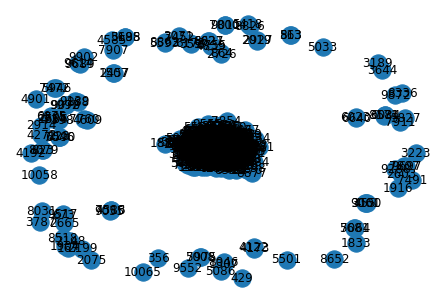

In [28]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

G2 = nx.from_numpy_matrix(adjacency_matrix)
nx.draw(G2, with_labels=True)

In [29]:
cols_to_use = []
for gene in uniprot_genes_used:
    cols_to_use.append(uniprot2entrez_id_map[gene])
#     cols_to_use.append(gene)

In [30]:
X = data[cols_to_use]
print(X.shape)

(889, 10070)


In [31]:
A = adjacency_matrix
D = np.diag(A.sum(axis=1))

In [32]:
D

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 4., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
L = D-A
print(L)

[[4. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
# eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)
# sort these based on the eigenvalues
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

In [35]:
print(vals, len(vals))

[  0.   0.   0. ... 217. 228. 378.] 10070


In [37]:
for i,v in enumerate(vals):
#     if(v!=0):
    if(v!=0 and v!=1):
        print(i,v)
        break

5759 2.0


In [38]:
# vecs[20]=vecs[20]+vecs[21]+vecs[22]+vecs[23]+vecs[24]+vecs[25]

In [39]:
# for i in range(27,44):
#     print(vals[i])
#     vecs[26] += vecs[i]



In [40]:
# vecs[26]

In [41]:
coords = pd.DataFrame({"x":vecs[3327],"y":vecs[5759],"uniprot_gene":uniprot_genes_used,"entrez_gene":cols_to_use})

In [42]:
coords

,x,y,uniprot_gene,entrez_gene
0,0.000013,0.000095,A0A024QYV7,23204
1,0.000000,0.000000,A0A024R0J9,11100
2,0.000000,0.000000,A0A024R183,5127
3,0.000000,0.000000,A0A024R1A3,7317
4,0.000000,0.000000,A0A024R327,11170
...,...,...,...,...
10065,0.000000,0.000000,V9HWH6,4860
10066,0.000000,0.000000,V9HWJ5,23475
10067,0.000000,0.000000,W5XKT8,147650
10068,0.000000,0.000000,X5DNA9,5413


In [90]:
np.min(coords['x']),np.max(coords['x'])

(-0.011751377145294393, 0.999800043669366)

In [91]:
np.min(coords['y']),np.max(coords['y'])

(-7.726426062143445e-19, 1.0)

In [105]:
y = np.linspace(-0.05, 1.0, num=101)
x = np.linspace(-0.1, 1.0, num=401)

def get_x_index(val):
    n = len(x)
    for i in range(0, n-1):
        if val>=x[i] and val<x[i+1]:
            return i
        elif val==x[n-1]:
            return n-1
        
def get_y_index(val):
    n = len(y)
    for i in range(0, n-1):
        if val>=y[i] and val<y[i+1]:
            return i
        elif val==y[n-1]:
            return n-1

In [106]:
get_x_index(0.7), get_y_index(0.9)

(290, 90)

In [107]:
def generate_input_array(coords, gene_exp):
    arr = np.zeros((100,400))
    for coord in range(len(coords)):
        x = get_x_index(coords.iloc[coord]['x'])
        y = get_y_index(coords.iloc[coord]['y'])
        gene = coords.iloc[coord]['uniprot_gene']
        idx = node_map[gene]
#         print(x,y)
#         idx = node_map[("hsa:"+str(gene))]
        if y>=100:
            y=99
        if x>=400:
            x=399
        arr[y][x] += (float)(gene_exp[idx])
    return arr

In [108]:
inp1 = generate_input_array(coords, X.iloc[0])

In [109]:
# randomized = np.load('./randomized.npy')
# randomized_label = np.load('./randomized_label.npy')

In [110]:
# randomized_label

In [111]:
l = [generate_input_array(coords, X.iloc[0])]
for i in range(1, 889):
    print(i)
    l.append(generate_input_array(coords, X.iloc[i]))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [112]:
randomized = np.array(l)

In [113]:
randomized_label = np.array(data['y'])

In [114]:
# randomized_label

In [115]:
randomized.shape

(889, 100, 400)

In [116]:
np.save('randomized_RCC', randomized)
np.save('randomized_label_RCC', randomized_label)